# 1. Importando Bibliotecas

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans


import warnings
warnings.filterwarnings('ignore')



# 2. Importando dados e leitura preliminar. 

In [19]:
try:   
    df_01= pd.read_csv(r'moved_project_sql_result_01.csv') # Número de corridas para cada empresa de táxi de 15 a 16 de novembro de 2017
    df_04= pd.read_csv(r'moved_project_sql_result_04.csv') # Bairros de Chicago onde as corridas teminaram e o número médio de viagens em novembro de 2017
    df_07= pd.read_csv(r'moved_project_sql_result_07.csv') # Dados de viagem  de Loop até o Aeroporto Internacional de O'Hare
except:
    df_01= pd.read_csv(r'/datasets/moved_project_sql_result_01.csv')
    df_04= pd.read_csv(r'/datasets/moved_project_sql_result_04.csv')
    df_07= pd.read_csv(r'/datasets/moved_project_sql_result_07.csv')


In [20]:
for df in [df_01, df_04, df_07]:
    display(df.head(3))
    df.info()
    print()
    print('Linhas duplicadas:', df.duplicated().sum())
    print()
    print('Dados Ausentes:',df.isnull().sum())
    print()
    print('='*50)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

Linhas duplicadas: 0

Dados Ausentes: company_name    0
trips_amount    0
dtype: int64



,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

Linhas duplicadas: 0

Dados Ausentes: dropoff_location_name    0
average_trips            0
dtype: int64



,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

Linhas duplicadas: 197

Dados Ausentes: start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64



In [21]:
df_07['start_ts'] = pd.to_datetime(df_07['start_ts'])
df_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


 Os Dataframes não possuem dados duplicados ou dados ausentes como esperado. O tipo de dados da coluna start_ts do dataframe 07 foi tratado. Então, podemos dar início a análise dos dados. 

# 3. Análise dos dados

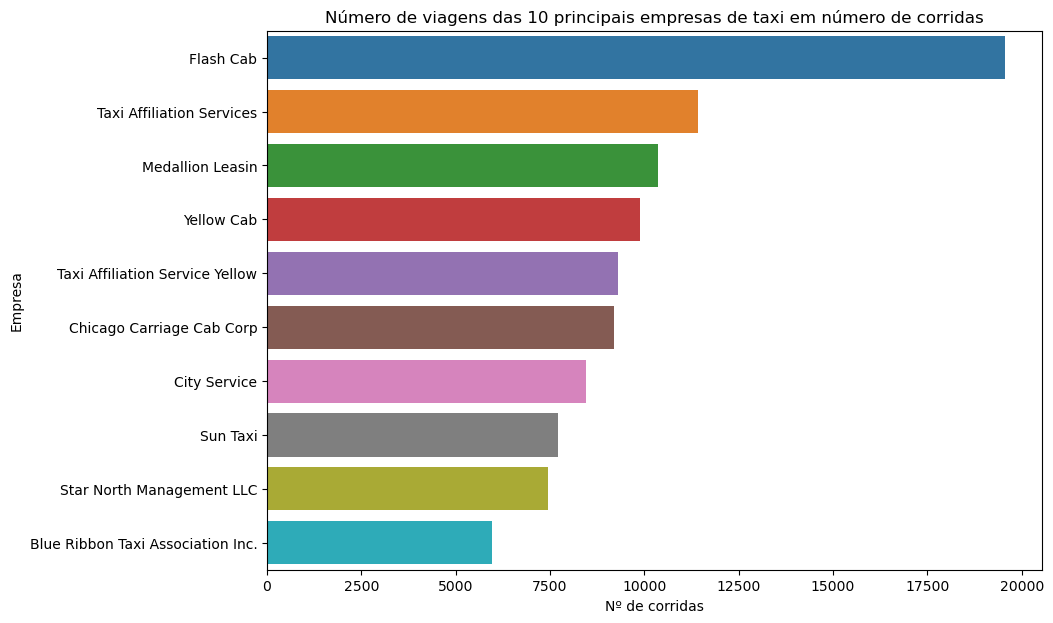

In [22]:
# Número de viagens das 10 principais empresas de taxi em número de corridas

plt.figure(figsize=(10, 7))
plt.title('Número de viagens das 10 principais empresas de taxi em número de corridas')
sns.barplot(data=df_01.head(10), y='company_name', x='trips_amount')
plt.xlabel('Nº de corridas')
plt.ylabel('Empresa')
plt.show();


A empresa Flash Cab lidera o Ranking em quantidade de corridas entre os dias 15 e 16 de Novembro de 2017. 

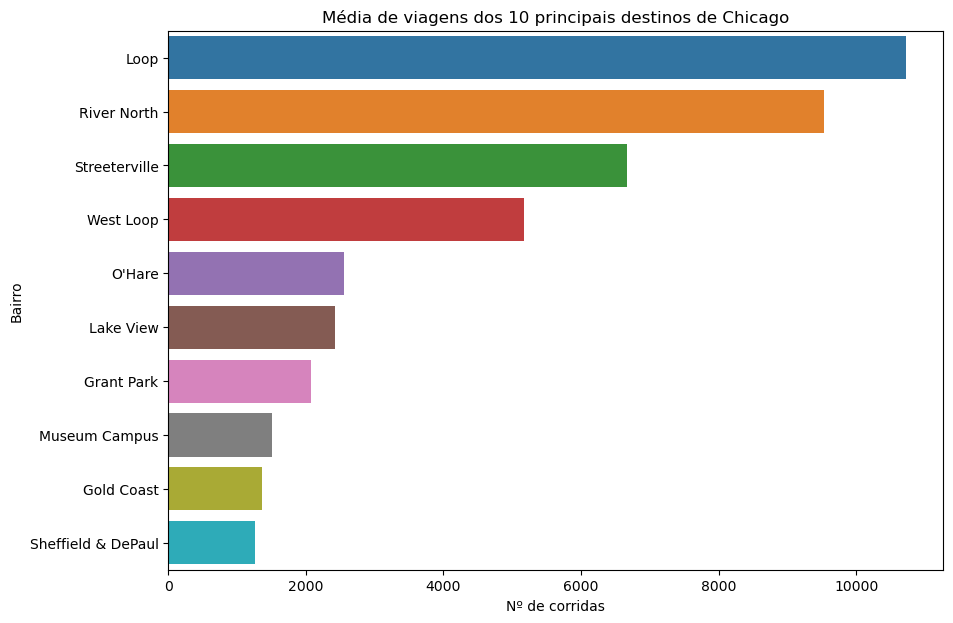

In [26]:
# Média de viagens dos 10 principais destinos de Chicago

plt.figure(figsize=(10, 7))
plt.title('Média de viagens dos 10 principais destinos de Chicago')
sns.barplot(data=df_04.head(10), y='dropoff_location_name', x='average_trips')
plt.xlabel('Nº de corridas')
plt.ylabel('Bairro')
plt.show();

O bairro Loop é o bairro com a maior quantidade de corrida tendo ele como destino no mês de Novembro de 2017, seguido por River North.

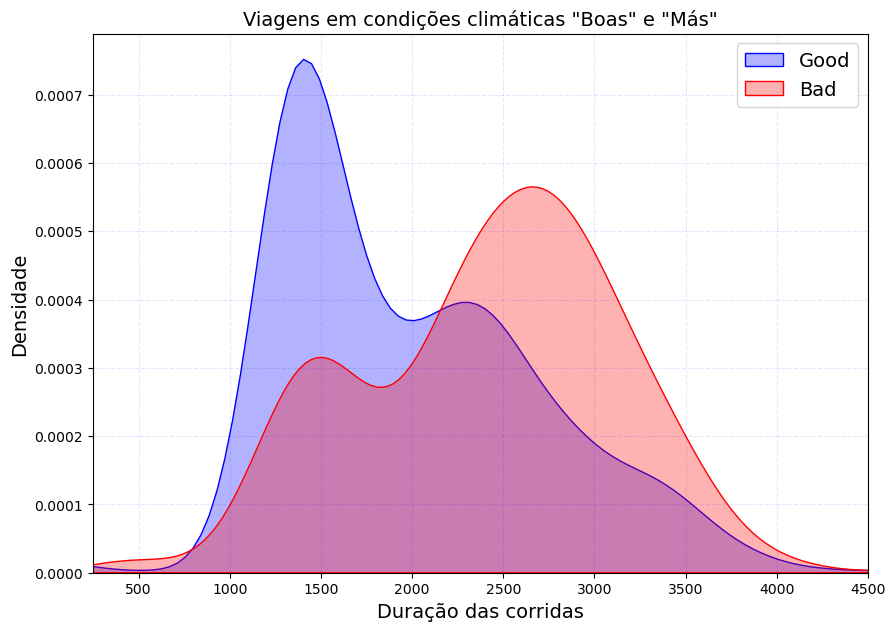

In [73]:
# Histograma do tempo de viagem em dias com condições climáticas "boas" e "más"

good = df_07[df_07['weather_conditions'] == 'Good']['duration_seconds']
bad = df_07[df_07['weather_conditions'] == 'Bad']['duration_seconds']

plt.figure(figsize=(10,7))

sns.distplot(good, hist=False, kde_kws={'shade':True, 'color':'blue', 'alpha':0.3}, label='Good')
sns.distplot(bad, hist=False, kde_kws={'shade':True, 'color':'red', 'alpha':0.3}, label='Bad')

plt.title('Viagens em condições climáticas "Boas" e "Más"', fontsize='14')
plt.xlabel('Duração das corridas', fontsize=14, color='k')
plt.ylabel('Densidade', fontsize=14, color='k')
plt.xlim(250, 4500)
plt.legend(fontsize=14)
plt.grid(which='both', color= 'b', linestyle='--', alpha=0.1)
plt.show()

## Conclusão Intermediária

> A companhia Flash Cab no período compreendido de 15 a 16 de Novembro de 2017 foi em torno de 20000 corridas. Em segundo lugar ficou Taxi Affiliation Services com cerca de 110000, valor esse sendo aproximadamente 50,50% do valor da Flash Cab, percebe-se uma preferência dos clientes pela Flash Cab em face as outras empresas de Táxi.

> A respeito dos destinos Loop é o destino mais cotado com mais de 10000 corridas, seguido de perto por River North. Os outros destinos possuem uma diferença significativa a partir do 3º lugar que é Streeterville. 

> Podemos ver graficamente a distribuição do tempo de viagem baseado nas condições do teto, uma vez vista gráficamente será testada estatisticamente. É nítido ver que o tempo de duração as viagens são bem maiores em dias chuvosos. O que é de se esperar.

## 3.1 Análise Estatística (Teste de Hipóteses)

### Teste a hipótese:

A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos?

* H0 - A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare **não** muda nos sábados independente da condição do clima.
* H1 - A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.




In [46]:
good = df_07[df_07['weather_conditions'] == 'Good']['duration_seconds']
bad = df_07[df_07['weather_conditions'] == 'Bad']['duration_seconds']
alpha = .5


good_test = DescrStatsW(good)
bad_test = DescrStatsW(bad)
teste = CompareMeans(good_test, bad_test)

z, p_value, qi = teste.ttest_ind(usevar='unequal')

if p_value < alpha:
    print('P Valor:', p_value)
    print('A Hipótese Nula foi Rejeitada')
else:
    print('P Valor:', p_value)
    print('A Hipótese Nula não foi Rejeitada')

P Valor: 6.7389943261087324e-12
A Hipótese Nula foi Rejeitada


# 4. Conclusão

Essa foi uma análise rápida e simples, apenas 1 problema nos dados que fora resolvido rápido e sem mais problemas.

É evidente a predileção dos clientes pela empresa Flash Cab, talvez pela quantidade ou área em que os seus serviços abrangem ela se destaque tanto, mas tal tópico não pode ser avaliado por falta de dados a respeito dessas questões. Mas em um período de 2 dias, ela apresentou quase 20000 corridas, o que é uma quantidade considerável.

Já a cidade de Loop parece ser destino de muitas pessoas em Chicago, sendo seguida logo por River North como visto graficamente acima, com números também consideráveis mais de 10000 corridas que a teve como destino. 

A respeito da Hipótese testada o alpha escolhido foi de .5 pois é o comum, até pelo tamanho da amostra que é pequena, acredito ser o mais indicado. Como visto gráficamente a distribuição das corridas elas diferem consideravelmente, enquanto a condição "good" é assimétrica a esquerda a "bad" é assimétrica a direita. 
O teste  estatistico as médias uma diferença estatistica significante. 
Ou seja, em sábados chuvosos a média de tempo das corridas são maiores que em sábados não chuvosos. 

